In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# funcs

def draw_path(p1, p2, ax):
    point1 = [1, 2]
    point2 = [3, 4]

    x_values = [p1[0], p2[0]]
    y_values = [p1[1], p2[1]]
    ax.plot(x_values, y_values, color="#343f56")
    
def plot_path(path, x, y, radius, ax=None):
    
    if ax is None:
        ax = plt.gca()   
            
    # circle
    circle = plt.Circle((0, 0), radius) 
    circle.set_fill(False)
    ax.add_patch(circle)
    
    # cities
    ax.scatter(x,y)
    ax.scatter(x[0],y[0], color="#fb9300")
    
    for i in range(np.size(x)-1):
        if (x[i]>0): 
            dx = radius*0.1
        if (x[i]<0): 
            dx = -radius*0.1
        if (y[i]>0): 
            dy = radius*0.2
        if (y[i]<0): 
            dy = -radius*0.2
        
        ax.text(x[i]+dx, y[i]+dy, str(i), color='r')
        
    # Grid and limits
    ax.grid(True)
    lim = radius*1.5
    ax.set_xlim([-lim,lim])
    ax.set_ylim([-lim,lim])

    # plot given path
    N = np.size(path)
    for i in range(N):
        if (i==N-1):
            a = int(path[i])
            b = int(path[0])
        else:
            a = int(path[i])
            b = int(path[i+1])
        p1 = [x[a], y[a]]
        p2 = [x[b], y[b]]
        draw_path(p1, p2, ax)
    
    return ax

def check_cost(path, x, y):
    path = path.astype(int)
    path = np.append(path, 0)
    sum = 0
    print(path ,"\n")
    for i in range(np.size(path)-1):
        a = path[i]
        b = path[i+1]
        sum += abs((x[a]- x[b])+(y[a]-y[b]))
    return sum

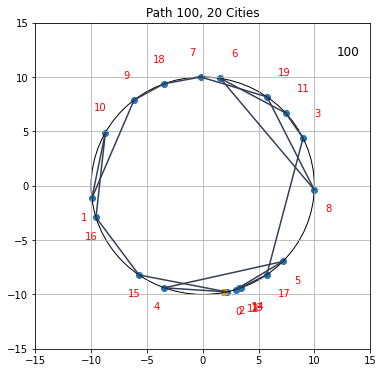

In [15]:
datafile = "./cities.dat"
x, y = np.loadtxt(datafile, usecols=(0, 1), unpack=True)

datafile = "./best_paths.dat"
best_paths = np.loadtxt(datafile)


n = 99
radius = 10
n_cities = np.size(x)-1
fig, ax = plt.subplots(figsize=(6,6))
ax = plot_path(best_paths[n], x, y, radius, ax)
# ax = plot_path(thebest, x, y, ax)

ax.title.set_text("Path " + str(n+1) +  ", " + str(n_cities)+" Cities")
ax.text(radius*1.2, radius*1.2, str(n+1), fontsize="large")

check_path = best_paths[n]
plt.show()